# Supervised Learning: Decision Tree and Random Forest (Project)

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <ul><a href='https://#1'>1. Import libraries</a></ul>
        <ul><a href='https://#2'>2. Load the Dataset</a></ul>
        <ul><a href="https://#3">3. Exploratory Data Analysis (EDA) and Feature Engineering</a></ul>
        <ul><a href="https://#4">4. Decision Tree Model</a></ul>
        <ul><a href="https://#5">4.1. Baseline Model: Results and Evaluation</a></ul>
        <ul><a href="https://#6">4.2. Hyperparameter Tunning: GridSearch and Cross Validation</a></ul>
        <ul><a href="https://#7">5. Random Forest Model</a></ul>
        <ul><a href="https://#8">5.1. Hyperparameter Tunning: GridSearch and Cross Validation </a></ul>
        <ul><a href="https://#9">5.2. Random Forest: Results and Evaluation</a></ul>
<br>
</div>
<hr>


<a id ="1"></a>
## 1. Import libraries

In [1]:
# Standard operational packages
import numpy as np
import pandas as pd

# Modelling and evaluation
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

<a id ="2"></a>
## 2. Load the dataset

In [320]:
with open('data/invistico_airline.pickle', 'rb') as to_read:
    data = pd.read_pickle(to_read)
    
data.head(n = 2)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0


<a id ="3"></a>
## 3. Exploratory Data Analysis (EDA) and Feature Engineering

In [321]:
# Descriptive statistics
data.describe().style.format(precision=2).background_gradient(cmap ='Accent')

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129487.00
mean,39.43,1981.41,2.84,2.99,2.85,2.99,3.25,3.38,3.52,3.47,3.47,3.49,3.70,3.34,3.71,3.35,14.71,15.09
std,15.12,1027.12,1.39,1.53,1.44,1.31,1.32,1.35,1.31,1.31,1.27,1.29,1.16,1.26,1.15,1.30,38.07,38.47
min,7.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,1359.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,1925.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,0.00,0.00
75%,51.00,2544.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,5.00,4.00,5.00,5.00,4.00,5.00,4.00,12.00,13.00
max,85.00,6951.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [322]:
# Data types
data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [323]:
# Check the Class unique values
data.Class.unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [324]:
# Check the counts of the predicted labels
data.satisfaction.value_counts(dropna = False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [325]:
# Check for missing values
data.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [326]:
# Check the number of rows and columns in the original dataset
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the original dataset')

There are 129880 rows and 22 columns in the original dataset


In [327]:
# Drop the rows with missing values
data_clean = data.dropna(axis=0).reset_index(drop = True)

In [328]:
# Check for missing values
data_clean.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [329]:
# Check the number of rows and columns in a modified dataset
print(f'There are {data_clean.shape[0]} rows and {data_clean.shape[1]} columns in a modified dataset')

There are 129487 rows and 22 columns in a modified dataset


In [330]:
# Data Encodong

# a) To convert the ordinal Class column into numeric one:
data_clean['Class'] = data_clean['Class'].map({"Business": 1, "Eco Plus": 2, "Eco": 3})

# b) To represent the data in the target variable Satisfaction numerically:
data_clean['satisfaction'] = data_clean['satisfaction'].map({"satisfied": 1, "dissatisfied": 0})

# c) To convert remaining categorical columns in the dataset into numeric ones:
data_clean = pd.get_dummies(data_clean, drop_first = True)

data_clean.rename(columns={'Customer Type_disloyal Customer': 'Customer Type', 
                           'Type of Travel_Personal Travel': 'Type of Travel'}, inplace=True)
data_clean.head(n = 2)

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type,Type of Travel
0,1,65,3,265,0,0,0,2,2,4,...,3,0,3,5,3,2,0,0.0,False,True
1,1,47,1,2464,0,0,0,3,0,2,...,4,4,4,2,3,2,310,305.0,False,True


In [331]:
# Check the updated column data types
data_clean.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type                           bool
Type of Travel                          bool
dtype: obj

<a id ="4"></a>
# 4. Decision Tree Model

In [332]:
# Training and testing datasets
target = 'satisfaction'
feature_cols = [x for x in data_clean.columns if x != target]

X = data_clean[feature_cols]
y = data_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [333]:
# Model construction

# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)
# Fit the model on the training set
decision_tree.fit(X_train, y_train)
# Make predictions on the test set
prediction = decision_tree.predict(X_test)

<a id ="5"></a>
## 4.1. Baseline Model: Results and Evaluation

In [334]:
# Baseline Model: Results and evaluation

result_table_dt = pd.DataFrame({'Model': ['Decision Tree'],
                                'Accuracy': [accuracy_score(y_test, prediction)],
                                'Precision': [precision_score(y_test, prediction)],
                                'Recall': [recall_score(y_test, prediction)],
                                 'F1': [f1_score(y_test, prediction)]
                                })
result_table_dt

,Model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.93374,0.938519,0.940723,0.93962


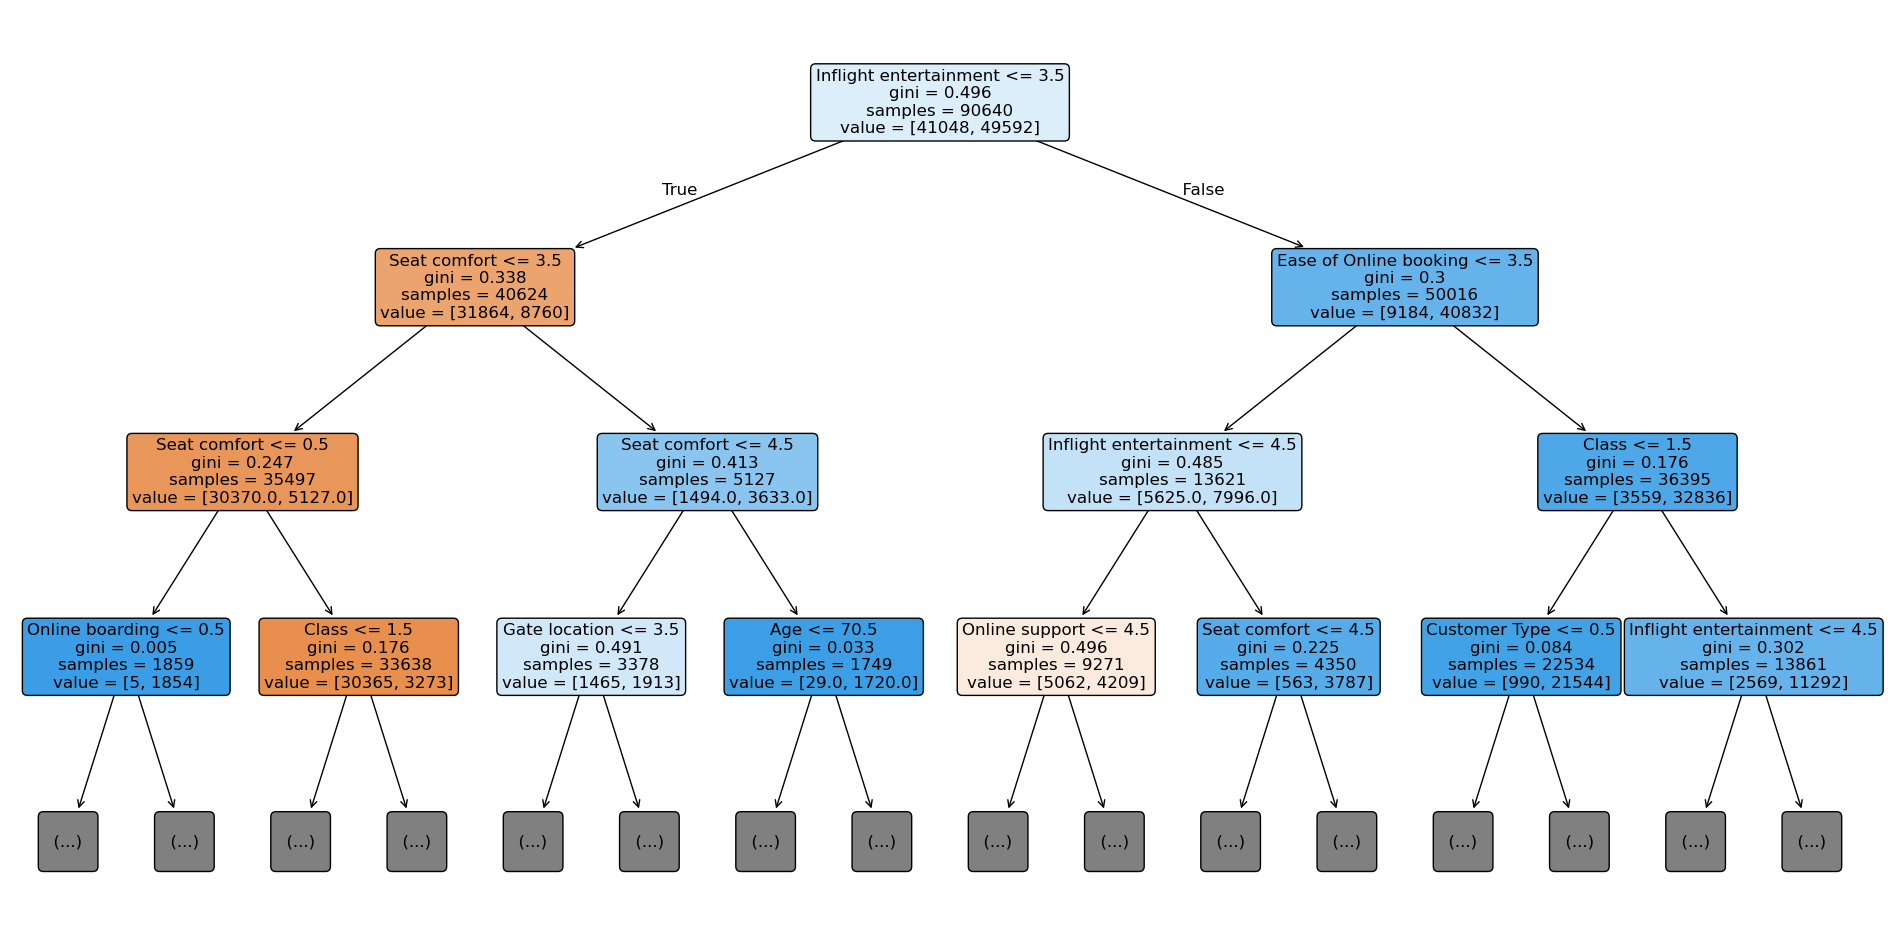

In [335]:
# Decision Tree: Plot
plt.figure(figsize=(24 ,12))
plot_tree(decision_tree, max_depth=3, fontsize=12, feature_names=X.columns, filled = True, rounded = True);

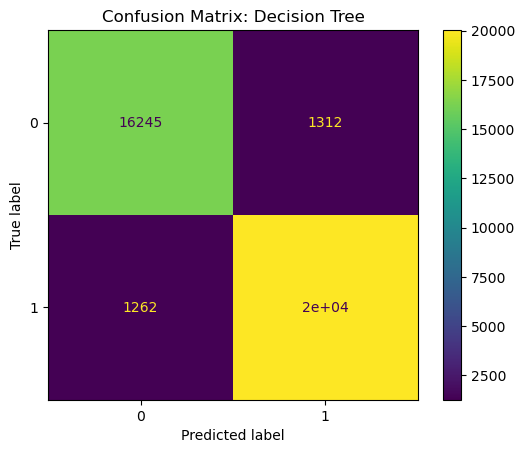

In [336]:
# Confusion Matrix Plot
def conf_matrix_plot(y_test, prediction):
    cm = confusion_matrix(y_test, prediction, labels = decision_tree.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = decision_tree.classes_)
    disp.plot()
    disp.ax_.set_title('Confusion Matrix: Decision Tree', fontsize = 12)
    plt.show()
    plt.close()

conf_matrix_plot(y_test, prediction)

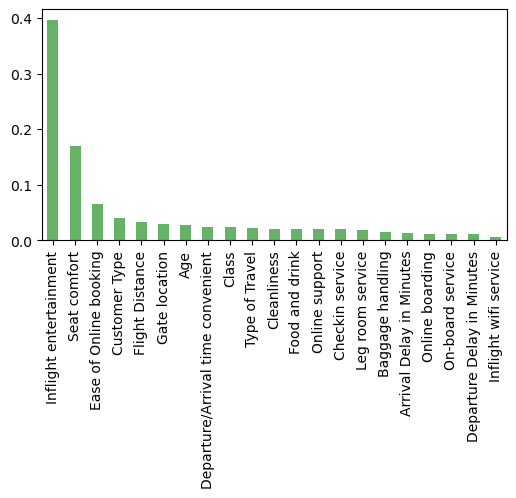

In [369]:
# Feature importance graph
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(6, 3)
forest_importances.plot.bar(ax=ax, color = 'green', alpha = 0.6);

<a id ="6"></a>
## 4.2. Hyperparameter Tunning: GridSearch and Cross Validation

In [346]:
# Hyperparamenters
tree_para = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40, 50],
             'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [347]:
# Tuned Decision Tree
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv = 5, 
                   refit = 'f1')

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [340]:
# The best combination of values for the hyperparameters
clf.best_estimator_

DecisionTreeClassifier(max_depth=17, min_samples_leaf=6, random_state=0)

In [348]:
# Determine the best average validation score
print(f'Best Average Validation Score: {clf.best_score_:.4f}')

Best Average Validation Score: 0.9435


In [349]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def results_table(model_name, model_object):

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

# Tuned Decision Tree: Results
result_table_clf = results_table("Tuned Decision Tree", clf)

# Results: Aggregated Table
results = pd.concat([result_table_dt, result_table_clf], ignore_index = True)
results.round(4).sort_values(by=['F1'], ascending=False, ignore_index = True)

,Model,Accuracy,Precision,Recall,F1
0,Tuned Decision Tree,0.9389,0.9543,0.9330,0.9435
1,Decision Tree,0.9337,0.9385,0.9407,0.9396


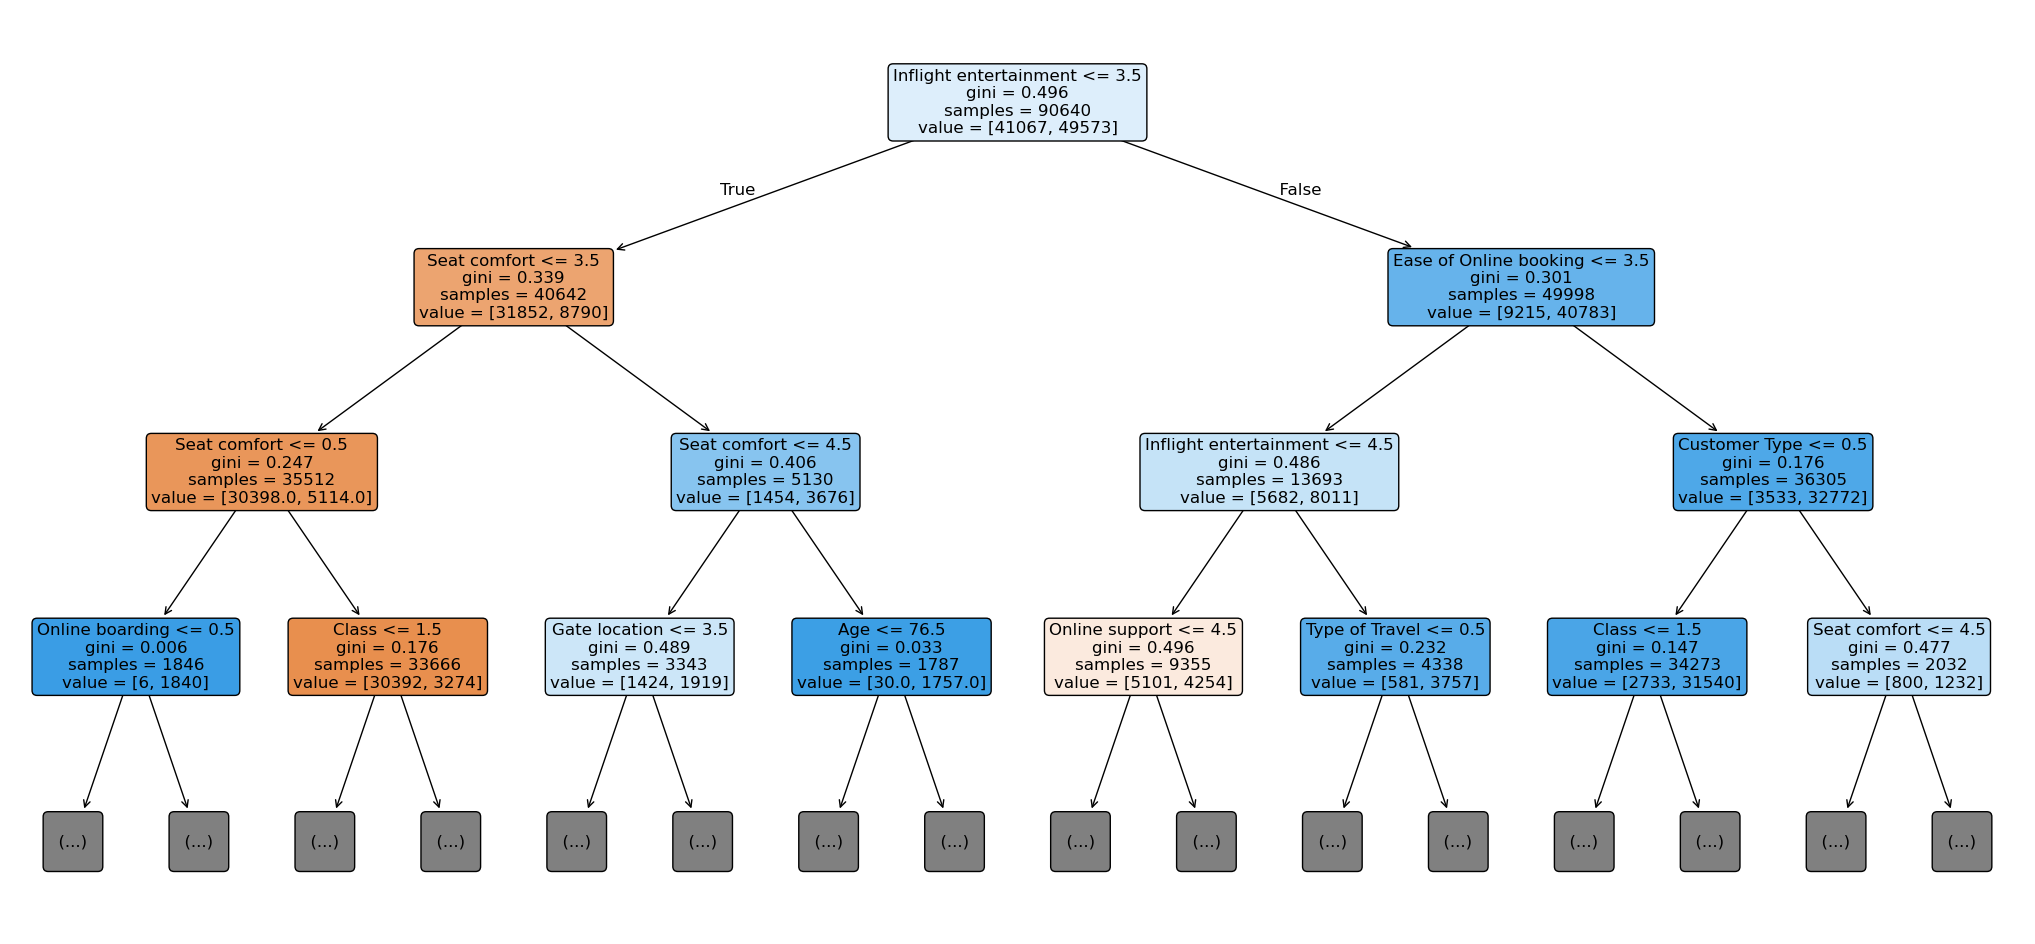

In [350]:
# Tuned Decision Tree: Plot
plt.figure(figsize=(26,12))
plot_tree(clf.best_estimator_, max_depth=3, fontsize=12, feature_names=X.columns, filled = True, rounded = True);

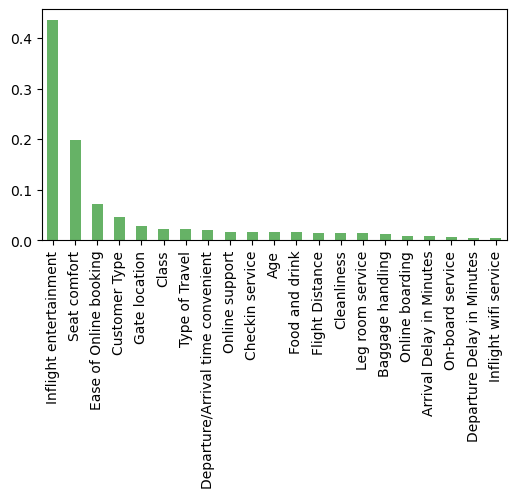

In [368]:
# Tuned Decision Tree: Feature importance graph
importances = clf.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(6, 3)
forest_importances.plot.bar(ax=ax, color = 'green', alpha = 0.6);

<a id ="7"></a>
# 5. Random Forest Model

In [352]:
# Training, validation and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

<a id ="8"></a>
## 5.1. Hyperparameter Tunning: GridSearch and Cross Validation

In [353]:
# Tune the model

# Hyperparameters
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [354]:
# List of split indices
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [355]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Search over specified parameters
rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

# Fit the model
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [277]:
# Random Forest: Results and evaluation

# Use optimal parameters on GridSearchCV
rf_opt = RandomForestClassifier(n_estimators = 50, max_depth = 50, 
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.9, random_state = 0)

In [356]:
# Fit the optimal model
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       n_estimators=50, random_state=0)

In [357]:
# Predict on test set (optimal model)
y_pred = rf_opt.predict(X_test)

<a id ="9"></a>
## 5.2. Random Forest: Results and Evaluation

In [358]:
# Evaluate the model

rc_test = recall_score(y_test, y_pred, pos_label = 1)
pc_test = precision_score(y_test, y_pred, pos_label = 1)
ac_test = accuracy_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred, pos_label = 1)

result_table_rfopt = pd.DataFrame({'Model': ['Tuned Random Forest'],
                                'Accuracy': ac_test,
                                'Precision': pc_test,
                                'Recall': rc_test,
                                 'F1': f1_test
                                })
result_table_rfopt

# Results: Aggregated Table
results = pd.concat([result_table_dt, result_table_clf, result_table_rfopt], ignore_index = True)
results.round(4).sort_values(by=['F1'], ascending=False, ignore_index = True)

,Model,Accuracy,Precision,Recall,F1
0,Tuned Random Forest,0.9429,0.9525,0.9428,0.9476
1,Tuned Decision Tree,0.9389,0.9543,0.9330,0.9435
2,Decision Tree,0.9337,0.9385,0.9407,0.9396


___
Author: Olga Khon, PhD in Finance